In [2]:
import pandas as pd

In [3]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [4]:
df=pd.read_csv('train_u6lujuX_CVtuZ9i.csv')

In [5]:
df.head(2)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N


C:\Users\hp\Anaconda3\lib\site-packages\numpy\lib\histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\hp\Anaconda3\lib\site-packages\numpy\lib\histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


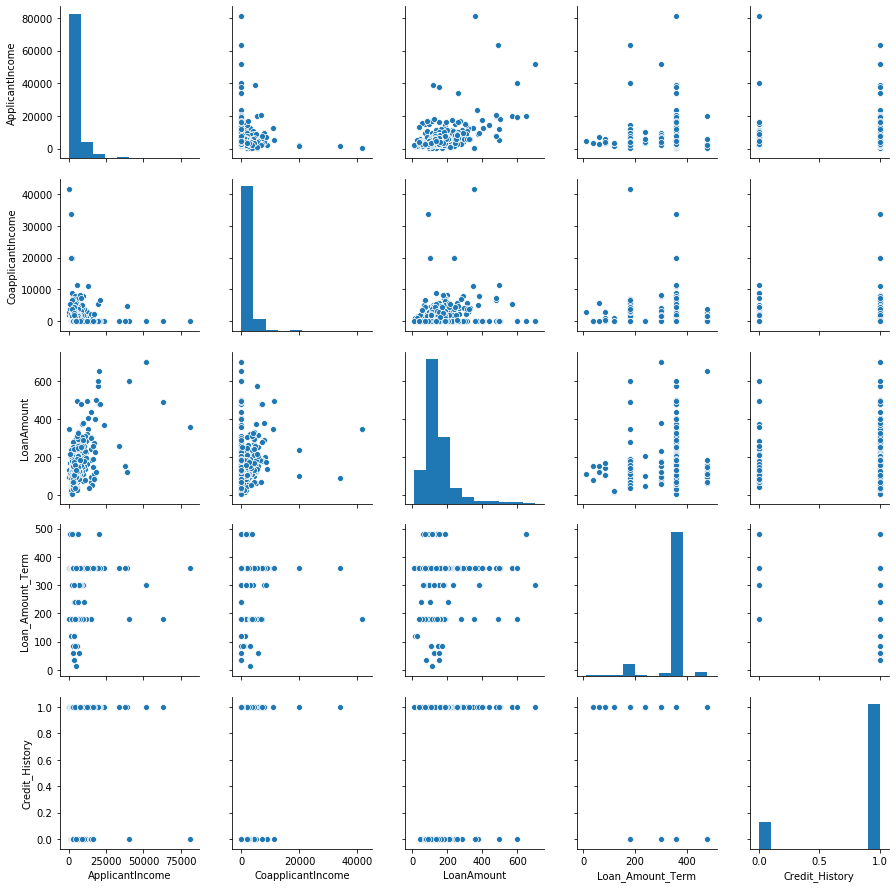

In [6]:
sns.pairplot(df)

In [7]:
df.drop(['Loan_ID'],axis=1,inplace=True)

In [8]:
df.head(2)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N


In [9]:
from scipy.stats import mode
df['Gender'].fillna(mode(df['Gender']).mode[0],inplace=True)
df['Married'].fillna(mode(df['Married']).mode[0],inplace=True)
df['Dependents'].fillna(mode(df['Dependents']).mode[0],inplace=True)
df['Self_Employed'].fillna(mode(df['Self_Employed']).mode[0],inplace=True)
df['LoanAmount'].fillna(np.mean(df['LoanAmount']),inplace=True)
df['Loan_Amount_Term'].fillna(np.mean(df['Loan_Amount_Term']),inplace=True)
df['Credit_History'].fillna(np.mean(df['Credit_History']),inplace=True)

C:\Users\hp\Anaconda3\lib\site-packages\scipy\stats\stats.py:248: RuntimeWarning: The input array could not be properly checked for nan values. nan values will be ignored.
  "values. nan values will be ignored.", RuntimeWarning)


In [10]:
df.head(2)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N


In [11]:
df.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [12]:
from sklearn.preprocessing import LabelEncoder

In [13]:
lr=LabelEncoder()

In [14]:
df['Gender']=lr.fit_transform(df['Gender'])

In [15]:
df['Married']=lr.fit_transform(df['Married'])

In [16]:
df['Dependents']=lr.fit_transform(df['Dependents'])
df['Education']=lr.fit_transform(df['Education'])
df['Self_Employed']=lr.fit_transform(df['Self_Employed'])
df['Property_Area']=lr.fit_transform(df['Property_Area'])
df['Loan_Status']=lr.fit_transform(df['Loan_Status'])

In [17]:
df.head(2)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,0,0,5849,0.0,146.412162,360.0,1.0,2,1
1,1,1,1,0,0,4583,1508.0,128.000000,360.0,1.0,0,0


In [18]:
df.dtypes

Gender                 int32
Married                int32
Dependents             int32
Education              int32
Self_Employed          int32
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area          int32
Loan_Status            int32
dtype: object

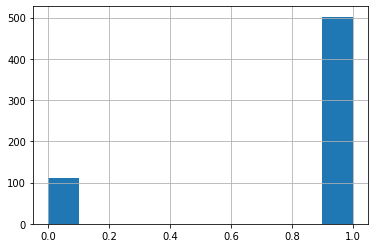

In [19]:
df['Gender'].hist()

In [25]:
X=df.drop('Loan_Status',axis=1)
Y=df['Loan_Status']

In [26]:
from sklearn.model_selection import train_test_split

In [29]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,random_state=7)

# Logistic Regression

In [30]:
from sklearn.linear_model import LogisticRegression

In [31]:
lr=LogisticRegression()

In [32]:
lr.fit(X_train,Y_train)

C:\Users\hp\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [33]:
pred=lr.predict(X_test)

In [34]:
from sklearn.metrics import accuracy_score

In [36]:
accuracy_score(Y_test,pred)

0.8108108108108109


# Decision tree

In [37]:
from sklearn.tree import DecisionTreeClassifier

In [38]:
dtree=DecisionTreeClassifier()

In [40]:
dtree.fit(X_train,Y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [41]:
y_pred=dtree.predict(X_test)

In [42]:
y_pred

array([0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1,
       1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0,
       1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1,
       1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1,
       1, 0, 1, 0, 1, 0, 1, 1, 1])

In [43]:
accuracy_score(Y_test,y_pred)

0.7189189189189189

In [44]:
from sklearn.metrics import classification_report,confusion_matrix

In [46]:
print(classification_report(Y_test,y_pred))

              precision    recall  f1-score   support

           0       0.57      0.59      0.58        61
           1       0.80      0.78      0.79       124

    accuracy                           0.72       185
   macro avg       0.68      0.69      0.68       185
weighted avg       0.72      0.72      0.72       185



# Random Forest

In [48]:
from sklearn.ensemble import RandomForestClassifier

rfc=RandomForestClassifier(n_estimators=100)
rfc.fit(X_train,Y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [49]:
rfc_pred=rfc.predict(X_test)

In [50]:
accuracy_score(Y_test,rfc_pred)

0.7837837837837838

In [51]:
print(classification_report(Y_test,rfc_pred))

              precision    recall  f1-score   support

           0       0.77      0.49      0.60        61
           1       0.79      0.93      0.85       124

    accuracy                           0.78       185
   macro avg       0.78      0.71      0.73       185
weighted avg       0.78      0.78      0.77       185



# KNN

In [61]:
from sklearn import neighbors,preprocessing

In [62]:
scaler = preprocessing.StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [80]:
knn = neighbors.KNeighborsClassifier(n_neighbors=5)

In [81]:
knn.fit(X_train, Y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [82]:
y_predi= knn.predict(X_test)
accuracy_score(Y_test, y_predi)

0.8108108108108109

# Naive Bayes

In [89]:
from sklearn.naive_bayes import GaussianNB

In [90]:
nb=GaussianNB()

In [91]:
nb.fit(X_train,Y_train)
predection=nb.predict(X_test)

In [92]:
accuracy_score(Y_test,predection)

0.8

# SVM

In [95]:
from sklearn.svm import SVC

In [106]:
svm=SVC(kernel='linear',C=0.025,random_state=101)
svm.fit(X_train,Y_train)
svm_pred=svm.predict(X_test)

In [107]:
accuracy_score(Y_test,svm_pred)

0.8108108108108109